In [1]:
import os
from pathlib import Path
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipynb


In [8]:
from ipynb.fs.full.datamanagement import user_filter, summarise_listening_history

In [7]:
# Read the data
CUR_DIR = os.path.abspath('')

DATA_DIR = Path(CUR_DIR).parent / "data"
FILE_PATH = DATA_DIR/'triplets_metadata_spotify.csv'
df = pd.read_csv(FILE_PATH, index_col = 0)

In [42]:
df = df.drop_duplicates(subset = ['user','track_id'], keep='first')

In [43]:
df.head()

,user,listening_count,song_name,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,shs_perf,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date,track_id
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,-1,...,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24,Stronger - Kanye West
1,9fba771d9731561eba47216f6fbfc0023d88641b,19,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,-1,...,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24,Stronger - Kanye West
2,85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b,1,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,-1,...,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24,Stronger - Kanye West
3,537340ff896dea11328910013cfe759413e1eeb3,2,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,-1,...,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24,Stronger - Kanye West
4,8fce200f3912e9608e3b1463cdb9c3529aab5c08,2,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,-1,...,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24,Stronger - Kanye West


In [44]:
df['track_id'] = df['song_name']+ ' - ' + df['artist_name']


In [45]:
# Get the sum of the listening count for a user and the number of songs he have listened
playlist_summary = summarise_listening_history(df)

In [12]:
playlist_summary.head()

,user,listening_count,track_count
0,0000175652312d12576d9e6b84f600caa24c4715,2,2
1,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,5,4
2,0000267bde1b3a70ea75cf2b2d216cb828e3202b,5,4
3,00003a4459f33b92906be11abe0e93efc423c0ff,4,2
4,00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,3,3


In [47]:
len(playlist_summary)

849209

In [11]:
print('Percent of users who have one listening : %.2f%%' %(sum(playlist_summary.listening_count == 1)*100/len(playlist_summary)))
print('Number of users who have less than 5 listening :', sum(playlist_summary.listening_count > 5))
print('Percent of users who have listened more than 5 different songs : %.2f%%' %(sum(playlist_summary.track_count > 5)*100/len(playlist_summary)))
print('Number of users who have listened more than 5 different songs :', sum(playlist_summary.track_count > 5))

Percent of users who have one listening : 13.17%
Number of users who have less than 5 listening : 484130
Percent of users who have listened more than 5 different songs : 31.86%
Number of users who have listened more than 5 different songs : 270576


In [74]:
FIG_PATH = Path(CUR_DIR).parent/'figures'

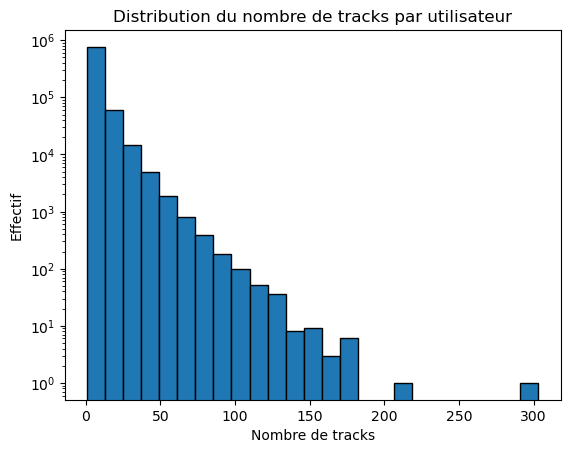

In [78]:
playlist_summary['track_count'].plot(kind = 'hist', logy = True, bins = 25, edgecolor = 'black')

plt.xlabel('Nombre de tracks')
plt.ylabel('Effectif')
plt.title('Distribution du nombre de tracks par utilisateur')
plt.savefig(FIG_PATH/f'Data_viz/dis_track_user.jpg')


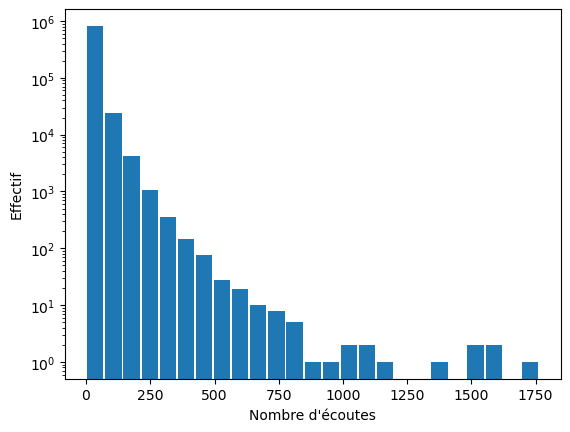

In [76]:
playlist_summary['listening_count'].plot(kind = 'hist', logy = True, bins = 25, rwidth= 0.9)
plt.xlabel("Nombre d'écoutes")
plt.ylabel('Effectif');

In [ ]:
# plt.hist()

In [46]:
playlist_summary.describe()

,listening_count,track_count
count,849209.000000,849209.000000
mean,15.852365,5.856914
std,26.458171,7.613085
min,1.000000,1.000000
25%,3.000000,2.000000
50%,7.000000,3.000000
75%,18.000000,7.000000
max,1763.000000,303.000000
